<a href="https://colab.research.google.com/github/salehbahrami596/Ima/blob/main/bear_detecteor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
#fastbook.setup_book()

In [2]:
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
bear_types = 'grizzly','teddy','black'
for o in bear_types:

  results = search_images_ddg( f'{o} bear',max_images=100)
  counterq = 1
  for k in results:
    dest = f'images/{o}/{o}{counterq}.jpg'
    counterq += 1
    try :
      download_url(k, dest)
    except:
      continue

In [5]:
path = Path('images')
fns = get_image_files(path)
fns

(#291) [Path('images/teddy/teddy89.jpg'),Path('images/teddy/teddy28.jpg'),Path('images/teddy/teddy18.jpg'),Path('images/teddy/teddy41.jpg'),Path('images/teddy/teddy60.jpg'),Path('images/teddy/teddy63.jpg'),Path('images/teddy/teddy3.jpg'),Path('images/teddy/teddy26.jpg'),Path('images/teddy/teddy74.jpg'),Path('images/teddy/teddy55.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#7) [Path('images/teddy/teddy15.jpg'),Path('images/teddy/teddy75.jpg'),Path('images/teddy/teddy61.jpg'),Path('images/grizzly/grizzly15.jpg'),Path('images/grizzly/grizzly83.jpg'),Path('images/black/black78.jpg'),Path('images/black/black64.jpg')]

In [7]:
failed.map(Path.unlink);

# **Data Loaders**

In [8]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = bears.dataloaders(path)

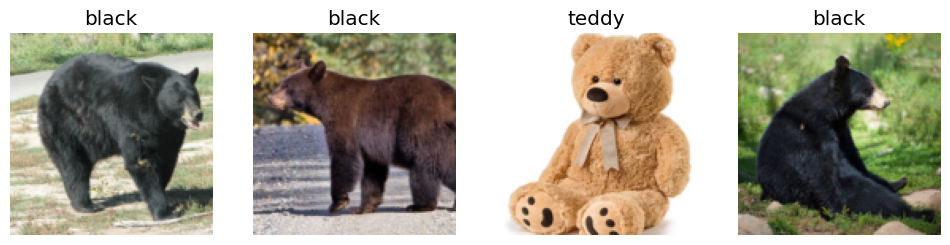

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.855989,1.011710,0.303571,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.470826,0.286653,0.089286,00:48
1,0.367749,0.261750,0.035714,00:54
2,0.287275,0.273058,0.035714,00:48
3,0.233943,0.264184,0.053571,00:52


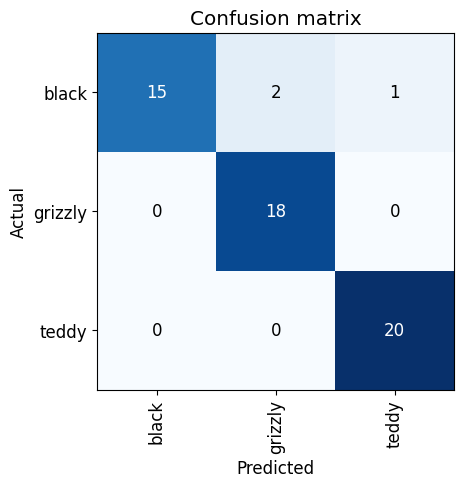

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

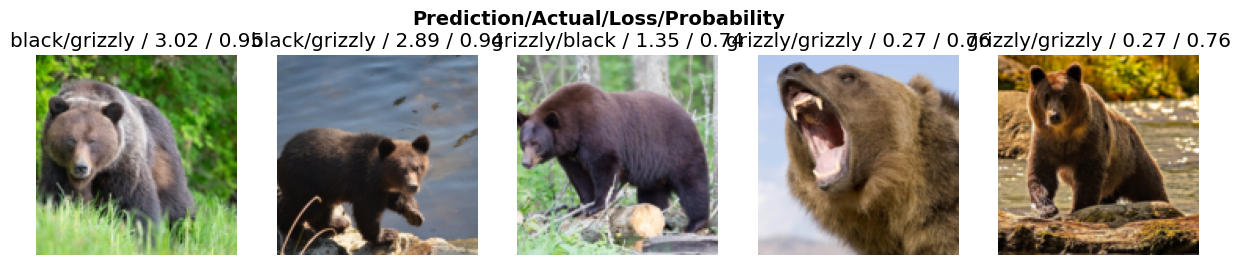

In [28]:
interp.plot_top_losses(5, nrows=1)


In [16]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [15]:
#import shutil
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [17]:
learn.export()


In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')


In [20]:
dep = search_images_ddg( 'Mr bean teddy',max_images=1)
print(dep)
dest_dep = 'imagesdep/my.jpg'
download_url(dep[0], dest_dep)

['https://ae01.alicdn.com/kf/HTB1Wbd0NVXXXXb6XFXXq6xXFXXXi/30cm-Mr-Bean-Teddy-Bear-Highly-reduce-animation-scene-Lovely-Classic-Bear-doll-Kids-toy-Xmas.jpg']


Path('imagesdep/my.jpg')

In [21]:
learn_inf.predict('imagesdep/my.jpg')


('teddy', tensor(2), tensor([1.1978e-04, 9.8587e-05, 9.9978e-01]))

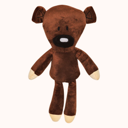

In [22]:
im = Image.open('imagesdep/my.jpg')
im.to_thumb(128,128)

In [23]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])

In [26]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [31]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred


Label(value='Prediction: grizzly; Probability: 0.4488')

In [32]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [34]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [35]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

IndexError: ignored

In [36]:
!pip install voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

In [37]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.4.0 OK


In [ ]:
!pip freeze